In [11]:
import numpy as np
import pandas as pd

events = pd.read_csv("License_To_Drift.csv")
pd.set_option('display.max_columns',200)

In [12]:
events_working = events[["STATE", "CITY", "US REGION", "MONTH", "DATES", "EVENT NAME", "EVENT TYPE",\
                        "WHAT TO DO?", "EVENT DESC (1 SC)", "GOOD 4 KIDS?", "ADMISSION (FREE/FEE)", "FEE DETAIL"]]
events_working

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,WHAT TO DO?,EVENT DESC (1 SC),GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",Prepare yourself for 100+ draft beers from reg...,NO,FEE,Tickets coming soon!
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,ACTIVE,The Cotopaxi Questival is a 24-hour adventure ...,YES,FEE,NOT IN 2019
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,"TASTEBUDS, LEARN",Premier gluten and allergen-free consumer show...,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,"TASTEBUDS, A&E",We bring together the best local breweries and...,NO,FEE,Not in 2019.
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,"ACTIVE, A&E",Featuring 15 and 30-mile rides departing from ...,NO,YES,$25 event general (spectator). $40-$50 registr...
...,...,...,...,...,...,...,...,...,...,...,...,...
1926,Wisconsin,Milwaukee,Midwest,Sept,Early Sept,Indian Summer Festival,Native Culture,"LEARN, A&E",The largest celebration of Native culture in t...,YES,FEE,$12 - $15 event general (kids under 12 free 20...
1927,Wisconsin,Somerset,Midwest,May,Mid May,Northern Invasion,Music/Rock,A&E,One of the largest rock fests in the Upper Mid...,NO,FEE,$129.50
1928,Wisconsin,Union Grove,Midwest,Oct,Mid/Late Oct,Great Pumpkin Chuckin Fest,"Pumpkin Catapult, BBQ Competition","A&E, ACTIVE",This 2-day event will feature Pumpkin Chuckin ...,YES,FREE,$0 event general.
1929,Wisconsin,West Salem,Midwest,Sep,Mid Sep,Twisted Maze Run,NaN,ACTIVE,Get Totally Twisted with this incredible CORN-...,YES,FEE,NaN


In [13]:
events_working = events_working.dropna(subset = ["EVENT DESC (1 SC)"])
events_working = events_working.dropna(subset = ["WHAT TO DO?"])
events_working["Alex_targets"] = events_working["WHAT TO DO?"]
events_working['Desc_with_name'] = events_working[['EVENT NAME', 'EVENT DESC (1 SC)']].apply(lambda x: ' '.join(x), axis=1)
events_working = events_working.drop(["EVENT DESC (1 SC)", "WHAT TO DO?"], axis = 1)
events_working = events_working.reset_index().drop("index", axis = 1)

In [40]:
events_working

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Alex_targets,Desc_with_name
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,NO,FEE,Tickets coming soon!,"TASTEBUDS, A&E",bacon beer classic prepare 100 draft beer regi...
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,YES,FEE,NOT IN 2019,ACTIVE,24hour adventure race team 26 friend explore u...
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,"TASTEBUDS, LEARN",gluten free allergen friendly expo premier glu...
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,NO,FEE,Not in 2019.,"TASTEBUDS, A&E",bacon beer classic bring together local brewer...
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,NO,YES,$25 event general (spectator). $40-$50 registr...,"ACTIVE, A&E",bike beer kalamazoo 15 30mile ride departing b...
...,...,...,...,...,...,...,...,...,...,...,...,...
1805,Wisconsin,Milwaukee,Midwest,Sept,Early Sept,Indian Summer Festival,Native Culture,YES,FEE,$12 - $15 event general (kids under 12 free 20...,"LEARN, A&E",indian summer largest native culture midwest l...
1806,Wisconsin,Somerset,Midwest,May,Mid May,Northern Invasion,Music/Rock,NO,FEE,$129.50,A&E,northern invasion one largest rock upper midwest
1807,Wisconsin,Union Grove,Midwest,Oct,Mid/Late Oct,Great Pumpkin Chuckin Fest,"Pumpkin Catapult, BBQ Competition",YES,FREE,$0 event general.,"A&E, ACTIVE",pumpkin chuckin 2day feature pumpkin chuckin c...
1808,Wisconsin,West Salem,Midwest,Sep,Mid Sep,Twisted Maze Run,NaN,YES,FEE,NaN,ACTIVE,twisted maze run get totally twisted incredibl...


In [14]:
import nltk
import re

# Convert all the string to lower cases
events_working.Desc_with_name = events_working.Desc_with_name.str.lower()
# \S+ means anything that is not an empty space
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: re.sub('\s+', ' ', x))
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: re.sub('[^\w\s]', '', x))

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english') + ["festival", "event", "festiv", "day", "week", "month", "year", "much"\
                                    "feature", "celebration", "celebrate", "featuring", "featurin", "include", \
                                    "weekend", "event", "featuring", "enjoy", "fest", "cotopaxi", "questival", \
                                    "around", "best", "including", "great", "first", "come", "throughout", "area", \
                                    "festivals", "events", "fairs", "days", "celebrations", "fests", "includes", \
                                    "features", "celebrating", "areas"]
#print(stop)

In [16]:
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda text: " ".join(word for word in text.split() if word not in stop))

In [17]:
from nltk.tokenize import word_tokenize 
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: word_tokenize(x))

In [18]:
# blanks = []
# for i in range(len(events_working.Desc_with_name)):
#     if len(events_working.Desc_with_name[i]) <= 5:
#         blanks.append(i)
# blanks

# events_working = events_working.drop(blanks).reset_index().drop("index", axis = 1)

[46, 1412, 1589, 1670]

In [20]:
events_working

,STATE,CITY,US REGION,MONTH,DATES,EVENT NAME,EVENT TYPE,GOOD 4 KIDS?,ADMISSION (FREE/FEE),FEE DETAIL,Alex_targets,Desc_with_name
0,Illinois,Chicago,Midwest,Oct,Early Oct,Bacon and Beer Classic,NaN,NO,FEE,Tickets coming soon!,"TASTEBUDS, A&E","[bacon, beer, classic, prepare, 100, draft, be..."
1,Illinois,Chicago,Midwest,Apr,Late Apr,Cotopaxi Questival,NaN,YES,FEE,NOT IN 2019,ACTIVE,"[24hour, adventure, race, teams, 26, friends, ..."
2,Illinois,Schaumburg,Midwest,Jun,Early Jun,Gluten Free and Allergen Friendly Expo,Food Expo,YES,FEE,$15 Adult Day Pass. $25 Adult Weekend Pass (ba...,"TASTEBUDS, LEARN","[gluten, free, allergen, friendly, expo, premi..."
3,Indiana,Indianapolis,Midwest,May,Mid/Late May,Bacon and Beer Classic,NaN,NO,FEE,Not in 2019.,"TASTEBUDS, A&E","[bacon, beer, classic, bring, together, local,..."
4,Michigan,Kalamazoo,Midwest,Aug,Late Aug,Bikes and Beers Kalamazoo,NaN,NO,YES,$25 event general (spectator). $40-$50 registr...,"ACTIVE, A&E","[bikes, beers, kalamazoo, 15, 30mile, rides, d..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1805,Wisconsin,Milwaukee,Midwest,Sept,Early Sept,Indian Summer Festival,Native Culture,YES,FEE,$12 - $15 event general (kids under 12 free 20...,"LEARN, A&E","[indian, summer, largest, native, culture, mid..."
1806,Wisconsin,Somerset,Midwest,May,Mid May,Northern Invasion,Music/Rock,NO,FEE,$129.50,A&E,"[northern, invasion, one, largest, rock, upper..."
1807,Wisconsin,Union Grove,Midwest,Oct,Mid/Late Oct,Great Pumpkin Chuckin Fest,"Pumpkin Catapult, BBQ Competition",YES,FREE,$0 event general.,"A&E, ACTIVE","[pumpkin, chuckin, 2day, feature, pumpkin, chu..."
1808,Wisconsin,West Salem,Midwest,Sep,Mid Sep,Twisted Maze Run,NaN,YES,FEE,NaN,ACTIVE,"[twisted, maze, run, get, totally, twisted, in..."


In [21]:
from nltk import WordNetLemmatizer
lemztr = WordNetLemmatizer()
events_working.Desc_with_name = events_working.Desc_with_name.apply(lambda x: ' '.join([lemztr.lemmatize(word) for word in x]))

In [22]:
from textblob import TextBlob
import itertools

In [23]:
def frame_to_dict (x): 
    all_list = list(x)
    all_dict = {}
    for thing in all_list:
        all_dict[thing] = all_list.count(thing)
    return all_dict

def n_gram_flattener(L): 
    N = []
    for item in L:
        new = "_".join(item)
        N.append(new)
    return N

In [25]:
blob = ' '.join(events_working.Desc_with_name)
len(blob)

new_blob = TextBlob(blob).ngrams(1)
new_blob_list = list(new_blob)
unigrams_for_dict = n_gram_flattener(new_blob_list)
new_blob_dict = frame_to_dict(unigrams_for_dict)
print(len(list(new_blob_dict.keys())))
{k: v for k, v in sorted(new_blob_dict.items(), key=lambda item: item[1], reverse = True)}

6632


{'music': 613,
 'food': 558,
 'art': 443,
 'live': 361,
 'craft': 357,
 'beer': 299,
 'show': 248,
 'local': 229,
 'wine': 229,
 'film': 226,
 'activity': 226,
 'vendor': 222,
 'entertainment': 216,
 'fun': 209,
 'family': 201,
 'world': 192,
 'community': 177,
 'new': 164,
 'ride': 163,
 'free': 155,
 'book': 146,
 'dance': 144,
 'yoga': 142,
 'game': 136,
 'experience': 133,
 'race': 132,
 'performance': 126,
 'fair': 124,
 'kid': 122,
 'contest': 121,
 'much': 120,
 'balloon': 120,
 'international': 119,
 'artist': 119,
 'workshop': 118,
 'one': 118,
 'country': 112,
 'winter': 111,
 'culture': 110,
 'parade': 108,
 'annual': 107,
 'city': 100,
 'carnival': 99,
 'largest': 97,
 'american': 93,
 'tasting': 93,
 'join': 93,
 'stage': 92,
 'demonstration': 91,
 'competition': 91,
 'park': 88,
 'class': 87,
 'run': 86,
 'people': 85,
 'variety': 83,
 'also': 83,
 'river': 83,
 'street': 82,
 'bacon': 81,
 'fall': 81,
 'u': 81,
 'hot': 81,
 'showcase': 80,
 'get': 78,
 'state': 78,
 'nat

In [26]:
def word_in_event(word):
    T = []
    F = []
    for i in range(len(events_working.Desc_with_name)): 
        if word in events_working.Desc_with_name[i]: 
            T.append(word in events_working.Desc_with_name[i])
        else:
            F.append(word in events_working.Desc_with_name[i])
    print(f"The word \"{word}\" appears in {round((len(T) / len(events_working.Desc_with_name)) * 100, 1)} % of events.")

In [27]:
for word in new_blob_dict.keys():
    if new_blob_dict[word] > 300:
        print(word_in_event(word))

The word "music" appears in 31.3 % of events.
None
The word "craft" appears in 19.0 % of events.
None
The word "food" appears in 29.3 % of events.
None
The word "art" appears in 33.9 % of events.
None
The word "live" appears in 20.2 % of events.
None


In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

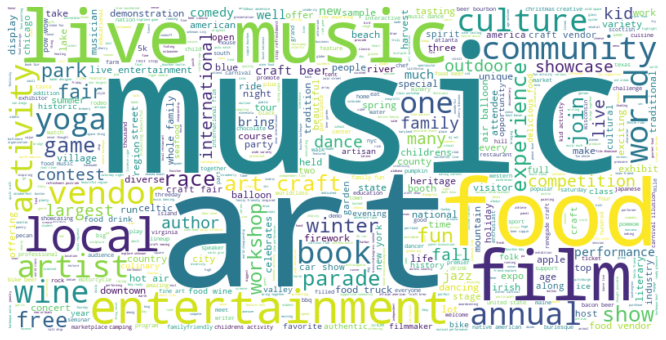

In [30]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)

wc.generate(' '.join(events_working.Desc_with_name))
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [34]:
desc = events_working.Desc_with_name.str.split()
tags = events_working.Alex_targets.str.lower().str.replace(r'[^a-zA-Z ]','').str.split()
tags[:10]

0       [tastebuds, ae]
1              [active]
2    [tastebuds, learn]
3       [tastebuds, ae]
4          [active, ae]
5       [tastebuds, ae]
6       [tastebuds, ae]
7          [active, ae]
8       [tastebuds, ae]
9          [active, ae]
Name: Alex_targets, dtype: object

In [35]:
docs = [TaggedDocument(d, t) for d, t in zip(desc, tags)]

In [46]:
docs[0]

TaggedDocument(words=['bacon', 'beer', 'classic', 'prepare', '100', 'draft', 'beer', 'regional', 'brewery', '30', 'creative', 'bacon', 'dish', 'local', 'chef', 'hormel', 'bacon', 'eating', 'contest', 'lawn', 'game', 'music', 'much', 'rally', 'foodie', 'friend', 'get', 'ready', 'experience', 'bacon', 'beer', 'like', 'never'], tags=['tastebuds', 'ae'])

In [37]:
doc_model = Doc2Vec(docs, dbow_words = 1, vector_size=10, window=7, min_count=2, workers=4)

In [39]:
new_vec = doc_model.infer_vector(["Come", "on", "down", "to", "our" "fourth", "of", "july", "fireworks", "festival", \
                            "we", "have", "the", "best", "show", "in", "town", "dozens", "of", "food", "vendors", \
                            "craft", "beer", "live", "music", "and", "games", "and", "tons", "of", "family", \
                            "friendly", "fun"])
doc_model.docvecs.most_similar([new_vec])

[('tastebuds', 0.7361915111541748),
 ('ae', 0.6757773756980896),
 ('learn', 0.658827543258667),
 ('active', 0.5805426836013794)]

In [47]:
doc_len_list = list(range(0, len(desc)))
stupid_list = []
for i in range(0, len(doc_len_list)):
    stupid_list.append(str(doc_len_list[i]).split())
print(type(stupid_list[0]))
len(stupid_list)

<class 'list'>


1810

In [48]:
cluster_docs = [TaggedDocument(d,s) for d,s in zip(desc, stupid_list)]
doc_model_2 = Doc2Vec(cluster_docs, dbow_words = 1, vector_size=10, window=7, min_count=2, workers=4)

In [49]:
doc_model_2.docvecs.most_similar([new_vec])

[('562', 0.7623293995857239),
 ('1245', 0.7591684460639954),
 ('1427', 0.7569759488105774),
 ('51', 0.7478751540184021),
 ('1168', 0.7452329993247986),
 ('1125', 0.7356520891189575),
 ('8', 0.7288838624954224),
 ('437', 0.7287278771400452),
 ('82', 0.7278832197189331),
 ('1120', 0.7261982560157776)]

In [50]:
cluster_docs[562]

TaggedDocument(words=['tampa', 'bay', 'black', 'heritage', 'music', 'host', 'variety', 'familyfriendly', 'activity', 'engaging', 'childrens', 'village', 'free', 'health', 'screening', 'food', 'vendor', 'localregional', 'musical', 'entertainment', 'giveaway', 'much'], tags=['562'])